In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import ListedColormap
colors = ['white', 'red', 'blue', 'orange', 'green', 'yellow']


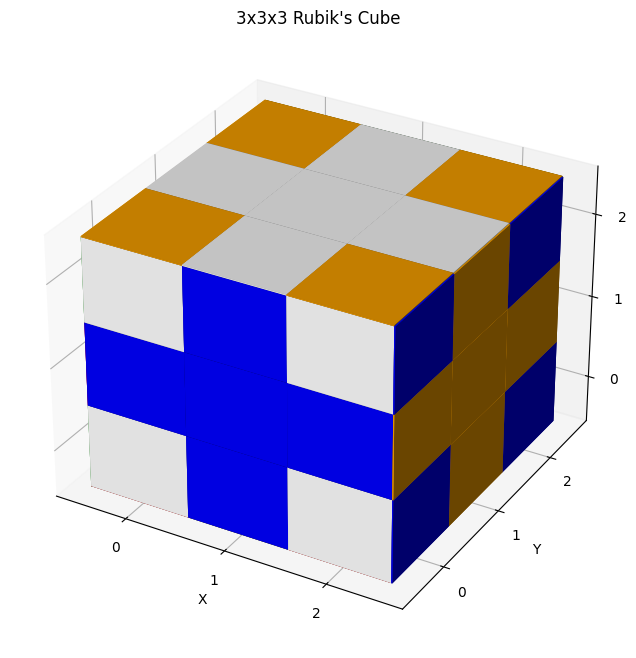

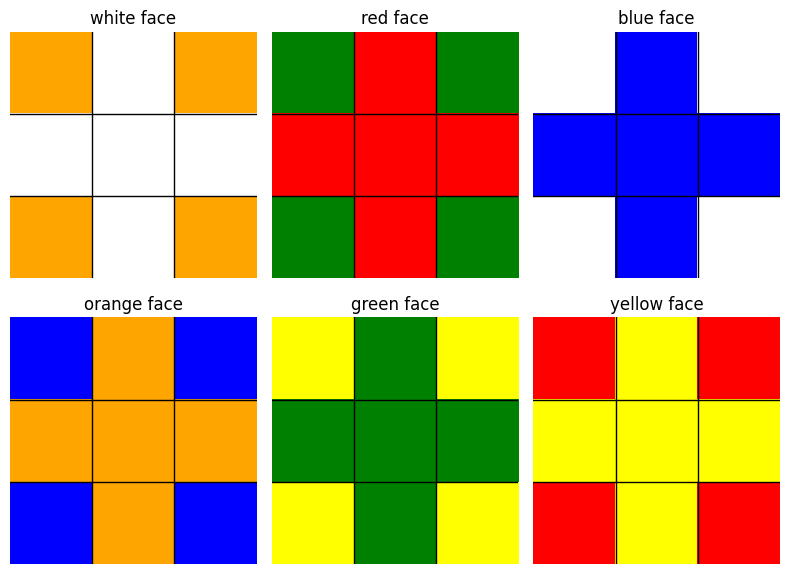

In [139]:
class Cube3x3:
    def __init__(self):

        # note
        # 0 = white
        # 1 = red
        # 2 = blue
        # 3 = orange
        # 4 = green
        # 5 = yellow
        self.colors = ['white', 'red', 'blue', 'orange', 'green', 'yellow']
        self.cmap = ListedColormap(colors)
        self.faces = np.array(
            [
                [
                    [0, 0, 0],
                    [0, 0, 0],
                    [0, 0, 0]
                ],
                [
                    [1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]
                ],
                [
                    [2, 2, 2],
                    [2, 2, 2],
                    [2, 2, 2]
                ],
                [
                    [3, 3, 3],
                    [3, 3, 3],
                    [3, 3, 3]
                ],
                [
                    [4, 4, 4],
                    [4, 4, 4],
                    [4, 4, 4]
                ],
                [
                    [5, 5, 5],
                    [5, 5, 5],
                    [5, 5, 5]
                ]
            ]
        )

        self.move_mapping = {
            'R': self.R,
            'Ri': self.Ri,
            'L': self.L,
            'Li': self.Li,
            'U': self.U,
            'Ui': self.Ui,
            'D': self.D,
            'Di': self.Di,
            'F': self.F,
            'Fi': self.Fi,
            'B': self.B,
            'Bi': self.Bi,
            'R2': self.R2,
            'L2': self.L2,
            'U2': self.U2,
            'D2': self.D2,
            'F2': self.F2,
            'B2': self.B2,
        }
        
    def move(self, moves_string, print_moves=False):
        # Replace special characters and split the input string
        moves_string = moves_string.replace("’", "i")  # Replace special single quote character
        moves_string = moves_string.replace("'", "i")  # Replace special single quote character
        moves_list = moves_string.split()

        # Iterate through the list of move names and convert to method calls
        method_calls = []
        for move in moves_list:
            if move in self.move_mapping:
                method_calls.append(self.move_mapping[move])
            else:
                method_calls.append("Invalid Move: " + move)

        # Print the converted method calls
        for method_call in method_calls:
            if print_moves:
                print(self.print_cube())
            method_call()
        if print_moves:
            print(self.print_cube())
    ## Possible Moves

    def U(self):
        self.faces[0] = np.rot90(self.faces[0],-1) # rotating clockwise
        temp = self.faces[4][0].copy()
        self.faces[4][0] = self.faces[1][0]
        self.faces[1][0] = self.faces[2][0]
        self.faces[2][0] = self.faces[3][0]
        self.faces[3][0] = temp
    def Ui(self):
        self.faces[0] = np.rot90(self.faces[0],1) # rotating anti clockwise
        temp = self.faces[4][0].copy()
        self.faces[4][0] = self.faces[3][0]
        self.faces[3][0] = self.faces[2][0]
        self.faces[2][0] = self.faces[1][0]
        self.faces[1][0] = temp
    def U2(self):
        self.U()
        self.U()
    def D(self):
        self.faces[5] = np.rot90(self.faces[5],-1) # rotating clockwise
        temp = self.faces[4][2].copy()
        self.faces[4][2] = self.faces[3][2]
        self.faces[3][2] = self.faces[2][2]
        self.faces[2][2] = self.faces[1][2]
        self.faces[1][2] = temp
    def Di(self):
        self.faces[5] = np.rot90(self.faces[5],1) # rotating anti clockwise
        temp = self.faces[4][2].copy()
        self.faces[4][2] = self.faces[1][2]
        self.faces[1][2] = self.faces[2][2]
        self.faces[2][2] = self.faces[3][2]
        self.faces[3][2] = temp
    def D2(self):
        self.D()
        self.D()
    def R(self):
        self.faces[3] = np.rot90(self.faces[3],-1) # rotating clockwise
        temp = self.faces[0][:,2].copy()
        self.faces[0][:,2] = self.faces[2][:,2]
        self.faces[2][:,2] = self.faces[5][:,2]
        self.faces[5][:,2] = self.faces[4][::-1,0]
        self.faces[4][::-1,0] = temp
    def Ri(self):
        self.faces[3] = np.rot90(self.faces[3],1) # rotating anti clockwise
        temp = self.faces[0][:,2].copy()
        self.faces[0][:,2] = self.faces[4][::-1,0]
        self.faces[4][::-1,0] = self.faces[5][:,2]
        self.faces[5][:,2] = self.faces[2][:,2]
        self.faces[2][:,2] = temp
    def R2(self):
        self.R()
        self.R()
    def L(self):
        self.faces[1] = np.rot90(self.faces[1],-1) # rotating clockwise
        temp = self.faces[0][:,0].copy()
        self.faces[0][:,0] = self.faces[4][::-1,2]
        self.faces[4][::-1,2] = self.faces[5][:,0]
        self.faces[5][:,0] = self.faces[2][:,0]
        self.faces[2][:,0] = temp
    def Li(self):
        self.faces[1] = np.rot90(self.faces[1],+1) # rotating anti clockwise
        temp = self.faces[0][:,0].copy()
        self.faces[0][:,0] = self.faces[2][:,0]
        self.faces[2][:,0] = self.faces[5][:,0]
        self.faces[5][:,0] = self.faces[4][::-1,2]
        self.faces[4][::-1,2] = temp
    def L2(self):
        self.L()
        self.L()
    def F(self):
        self.faces[2] = np.rot90(self.faces[2],-1) # rotating clockwise
        temp = self.faces[0][2].copy()
        self.faces[0][2] = self.faces[1][::-1,2]
        self.faces[1][:,2] = self.faces[5][0]
        # in reverse order swapping columns
        self.faces[5][0] = self.faces[3][::-1,0]
        self.faces[3][:,0] = temp
    def Fi(self):
        self.faces[2] = np.rot90(self.faces[2],1) # rotating anti clockwise
        temp = self.faces[0][2].copy()
        self.faces[0][2] = self.faces[3][:,0]
        self.faces[3][::-1,0] = self.faces[5][0]
        self.faces[5][0] = self.faces[1][:,2]
        self.faces[1][::-1,2] = temp
    def F2(self):
        self.F()
        self.F()
    def B(self):
        self.faces[4] = np.rot90(self.faces[4],1) # rotating clockwise
        temp = self.faces[0][0].copy()
        self.faces[0][0] = self.faces[3][:,2]
        self.faces[3][::-1,2] = self.faces[5][2]
        self.faces[5][2] = self.faces[1][:,0]
        self.faces[1][::-1,0] = temp
    def Bi(self):
        self.faces[4] = np.rot90(self.faces[4],-1) # rotating anti clockwise
        temp = self.faces[0][0].copy()
        self.faces[0][0] = self.faces[1][::-1,0]
        self.faces[1][:,0] = self.faces[5][2]
        self.faces[5][2] = self.faces[3][::-1,2]
        self.faces[3][:,2] = temp
    def B2(self):
        self.B()
        self.B()


    def print_cube(self):
        fig, axs = plt.subplots(2, 3, figsize=(8, 6))

        # Plot each 2D slice with the specified colors
        for i, ax in enumerate(axs.flat):
            for j in range(1, 3):
                ax.axhline(j - 0.5, color='black', linewidth=1)
                ax.axvline(j - 0.5, color='black', linewidth=1) 
            ax.imshow(self.faces[i], cmap=self.cmap, vmin=0, vmax=5)
            ax.set_title(f'{self.colors[i]} face')
            ax.axis('off')


        # Adjust layout and display the plot
        plt.tight_layout()
        plt.show()

    # working on it
    def print_3d(self):
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        for x in range(6):
            for y in range(3):
                for z in range(3):
                    color_idx = self.faces[x, 2-y, 2-z]  # Accessing faces in reverse order to match plotting
                    face_color = self.colors[color_idx]
                    # current view is top, front, right
                    # top bar
                    if x == 0:
                        ax.bar3d(y, z, 3, 1, 1, 0.01, shade=True, color=face_color)
                    # left bar
                    elif x == 1:
                        ax.bar3d(0, y, z, 0.01, 1, 1, shade=True, color=face_color)
                    # front bar
                    elif x == 2:
                        ax.bar3d(y, 0, z, 1, 0.01, 1, shade=True, color=face_color)
                    # right bar
                    elif x == 3:
                        ax.bar3d(3, y, z, 0.01, 1, 1, shade=True, color=face_color)
                    # back bar
                    elif x == 4:
                        ax.bar3d(y, 3, z, 1, 0.01, 1, shade=True, color=face_color)
                    # bottom bar
                    elif x == 5:
                        ax.bar3d(y, z, 0, 1, 1, 0.01, shade=True, color=face_color)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('3x3x3 Rubik\'s Cube')
        ax.set_xticks([0.5, 1.5, 2.5])
        ax.set_yticks([0.5, 1.5, 2.5])
        ax.set_zticks([0.5, 1.5, 2.5])
        ax.set_xticklabels(['0', '1', '2'])
        ax.set_yticklabels(['0', '1', '2'])
        ax.set_zticklabels(['0', '1', '2'])
        plt.show()

        plt.show()


cube = Cube3x3()
moves = 'R2 Li D F2 Ri Di Ri L Ui D R D B2 Ri U D2'
cube.move(moves)
cube.print_3d()
cube.print_cube()


<img src="cube.png">

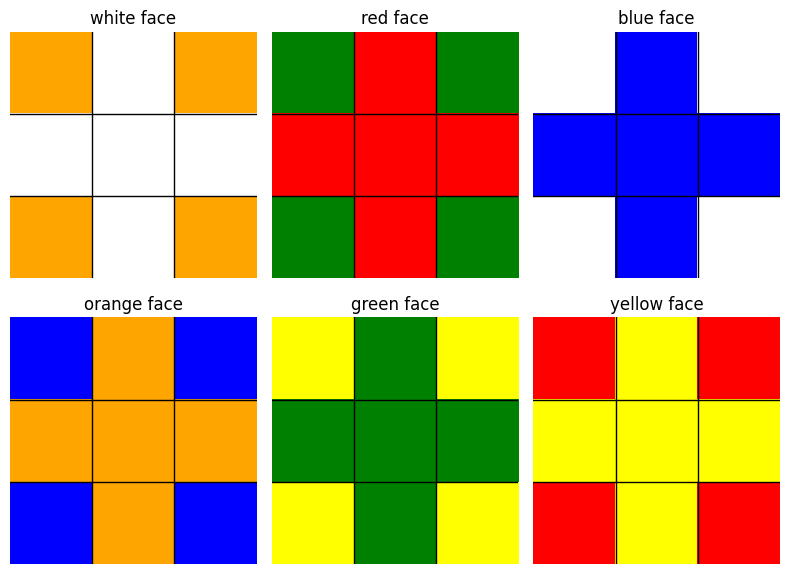

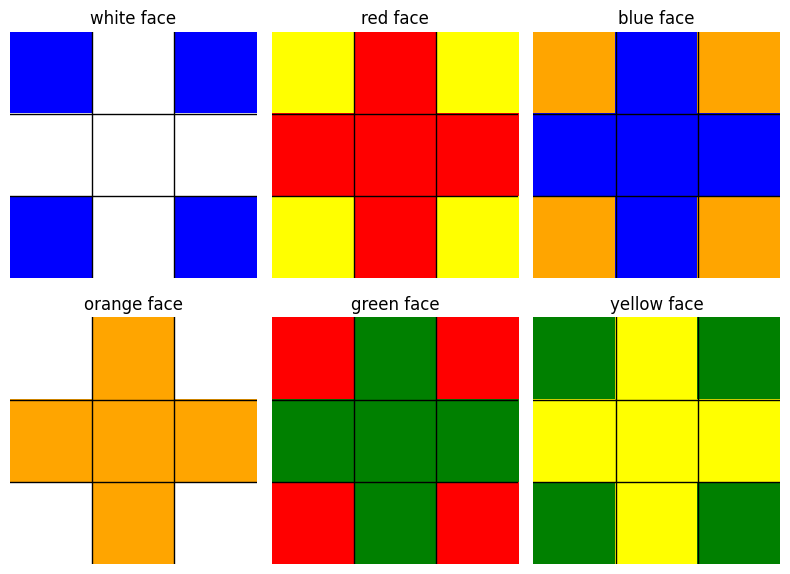

In [140]:
moves = 'R2 Li D F2 Ri Di Ri L Ui D R D B2 Ri U D2'
cube.print_cube()
cube.move(moves)
cube.print_cube()

In [49]:
cube.print_cube()

TypeError: Cube3x3.print_cube() missing 1 required positional argument: 'self'